In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = 'AppleGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)
font_name = fm.FontProperties(fname=font_path).get_name()

In [39]:
food_waste = pd.read_csv("01_음식물쓰레기_FOOD_WASTE_210811_update.CSV", encoding="cp949")
long_term_frgn = pd.read_csv("02-2_장기체류 외국인 유동인구_LONG_TERM_FRGN.CSV", encoding="cp949")
#card_spending = pd.read_csv("04_음식관련 카드소비_CARD_SPENDING.CSV", encoding="cp949")

/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 데이터 만들기

In [40]:
fw= food_waste.copy()
ltf= long_term_frgn.copy()
#cs = card_spending.copy()

In [24]:
fw.head()

,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt,year_month
0,2018-01-01,제주시,50110670,외도동,W6X062,2,15500,464,2018-01
1,2018-01-01,제주시,50110630,아라동,W6XA97,25,59800,1787,2018-01
2,2018-01-01,제주시,50110630,아라동,W6XA96,8,25350,758,2018-01
3,2018-01-01,제주시,50110630,아라동,W6XA95,12,30000,898,2018-01
4,2018-01-01,제주시,50110630,아라동,W6XA94,14,44050,1317,2018-01


In [25]:
ltf.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,year_month
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0000,4.5802,제주,2018-01
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1091,0.0000,5.7051,제주,2018-01
2,2018-01-01,1,CHN,제주시,50110250,한림읍,0.0000,7.8695,51.3461,그외,2018-01
3,2018-01-01,1,DEU,제주시,50110250,한림읍,0.0000,0.0000,8.2099,그외,2018-01
4,2018-01-01,1,ETC,제주시,50110250,한림읍,15.9184,0.0000,2.8758,제주,2018-01


In [41]:
#다운샘플링
def get_year_month(x):
    return x[0:7]
ltf['year_month'] = ltf['base_date'].apply(lambda x: get_year_month(x))
fw['year_month']= fw['base_date'].apply(lambda x: get_year_month(x))
# cs['year_month'] = cs['base_date'].apply(lambda x: get_year_month(x))

In [20]:
fw_1= fw.groupby(['year_month','emd_nm']).sum().reset_index()
fw_1

,year_month,emd_nm,em_cnt,em_g,pay_amt
0,2018-01,건입동,18416,45646550,1364804
1,2018-01,남원읍,9570,42437700,1270773
2,2018-01,노형동,113990,265018400,7883340
3,2018-01,대륜동,21666,57612600,1676850
4,2018-01,대정읍,10185,38885550,1164122
...,...,...,...,...,...
1661,2021-06,표선면,10751,42453750,1271419
1662,2021-06,한경면,8031,27060150,809898
1663,2021-06,한림읍,25653,82746990,2476292
1664,2021-06,화북동,66088,110750050,3306029


In [21]:
ltf_1 = ltf.groupby(['year_month','nationality','emd_nm']).sum().reset_index()
ltf_1

,year_month,nationality,emd_nm,time,emd_cd,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018-01,AUS,건입동,428,1653649470,0.0000,0.0000,193.1805
1,2018-01,AUS,구좌읍,415,2004410240,0.0000,0.0000,251.2195
2,2018-01,AUS,남원읍,1503,5363937071,0.0000,0.0000,648.0345
3,2018-01,AUS,노형동,9598,38134212260,11855.9924,738.9594,2612.7042
4,2018-01,AUS,대륜동,5864,28223522170,2701.0357,1576.0168,200.4630
...,...,...,...,...,...,...,...,...
52233,2021-06,VNM,표선면,11715,46069764080,2646.5554,0.0000,7603.5847
52234,2021-06,VNM,한경면,17111,68450683460,45349.6490,1121.2861,75816.8162
52235,2021-06,VNM,한림읍,18000,72158760000,97147.6156,3820.6787,61844.2041
52236,2021-06,VNM,화북동,17220,68902075000,13436.5104,2574.8044,8554.9721


In [51]:
# 장기체류, 음쓰 데이터 병합
temp = pd.merge(ltf_1, fw_1, how='outer')
temp

,year_month,nationality,emd_nm,time,emd_cd,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,em_cnt,em_g,pay_amt
0,2018-01,AUS,건입동,428.0,1.653649e+09,0.0000,0.0000,193.1805,18416.0,45646550.0,1364804.0
1,2018-01,BGD,건입동,394.0,1.453207e+09,0.0000,0.0000,188.6911,18416.0,45646550.0,1364804.0
2,2018-01,CAN,건입동,1615.0,6.915261e+09,0.0000,0.0000,645.8787,18416.0,45646550.0,1364804.0
3,2018-01,CHN,건입동,18312.0,7.346212e+10,29301.8946,5102.7961,36666.8951,18416.0,45646550.0,1364804.0
4,2018-01,DEU,건입동,48.0,1.503318e+08,0.0000,0.0000,24.0512,18416.0,45646550.0,1364804.0
...,...,...,...,...,...,...,...,...,...,...,...
52265,2021-02,NaN,알수없음,NaN,NaN,NaN,NaN,NaN,224.0,1985100.0,59502.0
52266,2021-03,NaN,알수없음,NaN,NaN,NaN,NaN,NaN,230.0,2153800.0,64560.0
52267,2021-04,NaN,알수없음,NaN,NaN,NaN,NaN,NaN,212.0,1936900.0,58057.0
52268,2021-05,NaN,알수없음,NaN,NaN,NaN,NaN,NaN,260.0,1910750.0,57259.0


In [52]:
temp.isnull().sum() 
# 알수없음 32개 결측치
# 배출량 관련 4840개 데이터 결측치

year_month          0
nationality        32
emd_nm              0
time               32
emd_cd             32
resd_pop_cnt       32
work_pop_cnt       32
visit_pop_cnt      32
em_cnt           4840
em_g             4840
pay_amt          4840
dtype: int64

In [53]:
temp= temp.dropna().reset_index()

In [49]:
# 장기체류, 음쓰 배출량, 카드소비내역 데이터 병합
temp2 = pd.merge(temp, cs_1)
temp2

,index,year_month,nationality,emd_nm,time,emd_cd,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,em_cnt,em_g,pay_amt,mct_cat_nm,mct_cat_cd,use_cnt,use_amt
0,0,2018-01,AUS,건입동,428.0,1.653649e+09,0.0000,0.0,193.1805,18416.0,45646550.0,1364804.0,간식,C00400,4540,52714107
1,0,2018-01,AUS,건입동,428.0,1.653649e+09,0.0000,0.0,193.1805,18416.0,45646550.0,1364804.0,농축수산물,C01200,1699,180535251
2,0,2018-01,AUS,건입동,428.0,1.653649e+09,0.0000,0.0,193.1805,18416.0,45646550.0,1364804.0,마트/슈퍼마켓,A00200,17547,613458055
3,0,2018-01,AUS,건입동,428.0,1.653649e+09,0.0000,0.0,193.1805,18416.0,45646550.0,1364804.0,배달,C01400,585,11571838
4,0,2018-01,AUS,건입동,428.0,1.653649e+09,0.0000,0.0,193.1805,18416.0,45646550.0,1364804.0,부페,C00700,55,5081850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515113,52237,2021-06,VNM,효돈동,10258.0,4.065588e+10,3122.2495,0.0,1634.7394,8720.0,27554100.0,824457.0,아시아음식,C00300,720,25716378
515114,52237,2021-06,VNM,효돈동,10258.0,4.065588e+10,3122.2495,0.0,1634.7394,8720.0,27554100.0,824457.0,양식,C00200,225,9302910
515115,52237,2021-06,VNM,효돈동,10258.0,4.065588e+10,3122.2495,0.0,1634.7394,8720.0,27554100.0,824457.0,주점및주류판매,C00900,105,4039593
515116,52237,2021-06,VNM,효돈동,10258.0,4.065588e+10,3122.2495,0.0,1634.7394,8720.0,27554100.0,824457.0,패스트푸드,C00500,1205,20827922


In [54]:
temp_1 = temp.groupby(['year_month','nationality']).sum().reset_index()
temp_1

,year_month,nationality,index,time,emd_cd,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,em_cnt,em_g,pay_amt
0,2018-01,AUS,20228,113917.0,4.615065e+11,1.187135e+05,7615.8548,3.733155e+04,923729.0,2.410146e+09,71661996.0
1,2018-01,BGD,10526,23159.0,9.371148e+10,1.430540e+04,0.0000,3.388691e+03,595440.0,1.529225e+09,45611969.0
2,2018-01,CAN,20286,237339.0,9.461326e+11,2.540812e+05,30711.5037,8.042474e+04,923729.0,2.410146e+09,71661996.0
3,2018-01,CHN,20323,650742.0,2.610332e+12,5.811431e+06,707138.4302,2.174797e+06,923729.0,2.410146e+09,71661996.0
4,2018-01,DEU,13190,16454.0,6.666850e+10,3.422792e+03,5568.8781,2.656186e+03,682525.0,1.776863e+09,52814305.0
...,...,...,...,...,...,...,...,...,...,...,...
1290,2021-06,TWN,2115366,150820.0,6.049931e+11,1.622234e+05,15479.0610,1.058513e+05,1296063.0,2.743759e+09,81926175.0
1291,2021-06,UKR,1547952,20668.0,8.349916e+10,7.159540e+03,0.0000,1.609713e+03,1046388.0,2.192568e+09,65456833.0
1292,2021-06,USA,2115437,565369.0,2.258976e+12,6.831811e+05,58809.7495,4.835736e+05,1296063.0,2.743759e+09,81926175.0
1293,2021-06,UZB,2115478,208900.0,8.243680e+11,7.340038e+04,2391.6780,4.927296e+04,1296063.0,2.743759e+09,81926175.0


In [55]:
temp_1['tot']=temp_1['resd_pop_cnt']+ temp_1['work_pop_cnt']+ temp_1['visit_pop_cnt']

# 국가별 상관계수로 국가 추출, 그 국가끼리의 상관관계 확인해서 클러스터링 진행

In [57]:
# 국가별 월 배출량과 tot인구 상관관계 
for i in sorted(set(temp_1['nationality'])):
    print(i)
    temp_list = [np.nan]
    temp = temp_1[temp_1['nationality']==i]
    temp_corr = temp[['em_g', 'tot']].corr()
    print(round(temp_corr.iloc[0,1],2))
    temp_list.append(round(temp_corr.iloc[0,1],2))
    BGD,DEU,EGY,ETC,FRA,GBR,IND,JPN,KAZ,KHM,MGL,NGR,PHL,UKR

AUS
-0.27
BGD
0.63
CAN
0.01
CHN
0.23
DEU
0.58
EGY
0.49
ETC
0.55
FRA
0.57
GBR
-0.36
IDN
0.24
IND
0.34
JPN
0.56
KAZ
0.3
KGZ
0.2
KHM
0.35
LKA
0.21
MGL
0.46
MMR
-0.11
MYS
0.04
NGR
0.55
NPL
0.12
NZL
-0.11
PAK
0.27
PHL
0.34
RUS
0.02
THA
-0.08
TWN
0.22
UKR
0.38
USA
0.16
UZB
0.12
VNM
0.27


In [59]:
nat_list = set({'BGD','DEU','EGY','ETC','FRA','GBR','IND','JPN','KAZ','KHM','MGL','NGR','PHL','UKR'})
year_month_list = set(temp_1.year_month)
corr_data = pd.DataFrame(columns = sorted(nat_list))
for i in nat_list:
    temp = temp_1[temp_1.nationality == i]
    corr_data.loc[:,i] = temp.T.loc['tot'].reset_index(drop=True).astype(int)

In [88]:
corr_na = corr_data.corr()
corr_na

,BGD,DEU,EGY,ETC,FRA,GBR,IND,JPN,KAZ,KHM,MGL,NGR,PHL,UKR
BGD,1.000000,0.508347,0.345393,0.640358,0.566937,0.056499,0.762328,0.575653,0.347814,0.384771,0.631035,0.348138,0.501873,-0.452195
DEU,0.508347,1.000000,0.458403,0.825721,0.896479,0.198367,0.488400,0.767624,-0.121817,0.360586,0.519223,0.387746,0.408172,-0.142711
EGY,0.345393,0.458403,1.000000,0.605746,0.313421,0.209716,0.245625,0.463225,-0.194036,0.355167,0.100353,0.758755,-0.032616,0.195100
ETC,0.640358,0.825721,0.605746,1.000000,0.832282,0.315738,0.709955,0.870039,-0.178075,0.563645,0.445325,0.640172,0.597531,-0.320235
FRA,0.566937,0.896479,0.313421,0.832282,1.000000,0.266105,0.593696,0.821095,-0.056025,0.485331,0.592928,0.327762,0.527618,-0.213915
GBR,0.056499,0.198367,0.209716,0.315738,0.266105,1.000000,0.418191,0.258549,-0.362051,0.309844,-0.169498,0.101947,0.332949,-0.014780
IND,0.762328,0.488400,0.245625,0.709955,0.593696,0.418191,1.000000,0.671368,0.093067,0.531630,0.372611,0.318016,0.810176,-0.607595
JPN,0.575653,0.767624,0.463225,0.870039,0.821095,0.258549,0.671368,1.000000,-0.091466,0.620390,0.482616,0.531416,0.688447,-0.315847
KAZ,0.347814,-0.121817,-0.194036,-0.178075,-0.056025,-0.362051,0.093067,-0.091466,1.000000,-0.054172,0.287092,-0.312389,0.106328,-0.241816
KHM,0.384771,0.360586,0.355167,0.563645,0.485331,0.309844,0.531630,0.620390,-0.054172,1.000000,0.169225,0.164783,0.527802,-0.302858


In [64]:
# lag, diff
nat_list = set({'BGD','DEU','EGY','ETC','FRA','GBR','IND','JPN','KAZ','KHM','MGL','NGR','PHL','UKR'})
year_month_list = set(temp_1.year_month)
corr_data_diff = pd.DataFrame(columns = sorted(nat_list))
for i in nat_list:
    temp = temp_1[temp_1.nationality == i]
    temp['tot']=temp['tot'].diff()
    temp['tot']=temp['tot'].shift(1)
    temp= temp.dropna()
    corr_data_diff.loc[:,i] = temp.T.loc['tot'].reset_index(drop=True).astype(int)

/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
corr_diff= corr_data_diff.corr()
corr_diff

,BGD,DEU,EGY,ETC,FRA,GBR,IND,JPN,KAZ,KHM,MGL,NGR,PHL,UKR
BGD,1.000000,0.082830,0.166313,0.260313,-0.049715,0.128696,0.256299,0.263880,0.357728,0.218945,0.132647,0.111986,0.115107,0.130030
DEU,0.082830,1.000000,0.127004,0.285509,0.336089,0.095344,0.103746,0.344314,0.075299,0.320562,0.242391,-0.468167,0.195172,0.094241
EGY,0.166313,0.127004,1.000000,0.078185,-0.183224,0.156347,0.317401,0.248400,0.253043,0.116177,-0.016116,0.173225,-0.005116,0.294374
ETC,0.260313,0.285509,0.078185,1.000000,0.487009,0.404182,0.440968,0.601470,0.287993,0.528364,0.146902,-0.158395,0.431230,0.176416
FRA,-0.049715,0.336089,-0.183224,0.487009,1.000000,0.292555,-0.057690,0.443767,0.007263,0.276245,0.347874,-0.211221,0.153202,0.349941
GBR,0.128696,0.095344,0.156347,0.404182,0.292555,1.000000,0.341111,0.158744,-0.154098,0.327012,0.114559,-0.156753,0.162743,0.241769
IND,0.256299,0.103746,0.317401,0.440968,-0.057690,0.341111,1.000000,0.515188,0.248471,0.544519,-0.075663,-0.034076,0.526864,-0.125044
JPN,0.263880,0.344314,0.248400,0.601470,0.443767,0.158744,0.515188,1.000000,0.330595,0.588878,0.213813,-0.047682,0.649789,0.117942
KAZ,0.357728,0.075299,0.253043,0.287993,0.007263,-0.154098,0.248471,0.330595,1.000000,0.123564,0.075926,0.184484,0.259604,0.103527
KHM,0.218945,0.320562,0.116177,0.528364,0.276245,0.327012,0.544519,0.588878,0.123564,1.000000,0.330413,0.020760,0.610288,0.094037


In [72]:
# lag, log
import sys
nat_list = set({'BGD','DEU','EGY','ETC','FRA','GBR','IND','JPN','KAZ','KHM','MGL','NGR','PHL','UKR'})
year_month_list = set(temp_1.year_month)
corr_data_log = pd.DataFrame(columns = sorted(nat_list))
for i in nat_list:
    temp = temp_1[temp_1.nationality == i]
    temp['tot']=temp['tot'].shift(1)
    temp= temp.dropna()
    corr_data_log.loc[:,i] = np.log(temp.T.loc['tot'].reset_index(drop=True).astype(int))

/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [73]:
corr_log= corr_data_log.corr()
corr_log

,BGD,DEU,EGY,ETC,FRA,GBR,IND,JPN,KAZ,KHM,MGL,NGR,PHL,UKR
BGD,1.000000,0.646527,0.084010,0.679164,0.667867,0.066546,0.841952,0.573276,0.286075,0.333533,0.656995,0.264641,0.651049,-0.433536
DEU,0.646527,1.000000,0.427144,0.842504,0.911137,0.159224,0.584005,0.860220,-0.052374,0.584513,0.630227,0.418767,0.538538,-0.252857
EGY,0.084010,0.427144,1.000000,0.414026,0.220438,0.195818,0.152911,0.334116,-0.004177,0.307901,0.051238,0.643067,-0.077323,0.109887
ETC,0.679164,0.842504,0.414026,1.000000,0.837327,0.285215,0.730029,0.868628,-0.151701,0.645833,0.485706,0.469912,0.664311,-0.372598
FRA,0.667867,0.911137,0.220438,0.837327,1.000000,0.222150,0.642683,0.852015,-0.000984,0.618675,0.669706,0.309771,0.615876,-0.357560
GBR,0.066546,0.159224,0.195818,0.285215,0.222150,1.000000,0.377670,0.172769,-0.359467,0.289693,-0.155071,-0.107742,0.202385,-0.122172
IND,0.841952,0.584005,0.152911,0.730029,0.642683,0.377670,1.000000,0.607544,0.102579,0.442213,0.404279,0.204073,0.764848,-0.576838
JPN,0.573276,0.860220,0.334116,0.868628,0.852015,0.172769,0.607544,1.000000,-0.079403,0.691413,0.506685,0.426030,0.682581,-0.378567
KAZ,0.286075,-0.052374,-0.004177,-0.151701,-0.000984,-0.359467,0.102579,-0.079403,1.000000,-0.046564,0.242651,-0.112823,0.128497,-0.220189
KHM,0.333533,0.584513,0.307901,0.645833,0.618675,0.289693,0.442213,0.691413,-0.046564,1.000000,0.191749,0.178503,0.472219,-0.462298


,predict
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,2
9,1


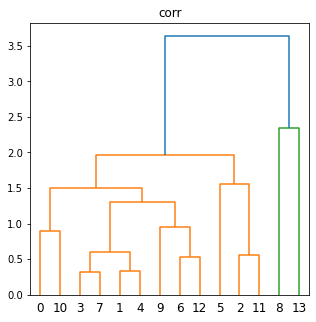

In [89]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster

corr = corr_na.values

plt.figure(figsize=(5,5))
plt.title('corr')
dend=sch.dendrogram(sch.linkage(corr_na,method='complete')) #method 설정 가능

pdist = sch.distance.pdist(corr)
predict=pd.DataFrame(sch.fcluster(sch.linkage(corr_na ,method='complete'),0.8* pdist.max() ,criterion='distance'))
predict.columns=['predict']
predict

# 국가 클러스터링 반영

In [90]:
predict['nationality'] = sorted(set({'BGD','DEU','EGY','ETC','FRA','GBR','IND','JPN','KAZ','KHM','MGL','NGR','PHL','UKR'}))
temp2 = pd.merge(temp_1, predict, on='nationality', how='outer')
temp2= temp2.fillna(9)
temp2

,year_month,nationality,index,time,emd_cd,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,em_cnt,em_g,pay_amt,tot,predict
0,2018-01,AUS,20228,113917.0,4.615065e+11,1.187135e+05,7615.8548,3.733155e+04,923729.0,2.410146e+09,71661996.0,1.636609e+05,9.0
1,2018-02,AUS,64898,111092.0,4.474316e+11,1.046299e+05,12576.0080,3.754484e+04,857571.0,2.237663e+09,66617693.0,1.547508e+05,9.0
2,2018-03,AUS,110126,132782.0,5.331326e+11,1.113435e+05,8475.2832,4.090341e+04,963207.0,2.451218e+09,72928625.0,1.607222e+05,9.0
3,2018-04,AUS,155962,111866.0,4.497914e+11,1.133303e+05,9522.1913,3.318737e+04,946849.0,2.253442e+09,67048102.0,1.560399e+05,9.0
4,2018-05,AUS,201614,114159.0,4.575043e+11,1.122734e+05,8684.1017,3.382864e+04,1044433.0,2.313361e+09,68840476.0,1.547861e+05,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,2021-02,VNM,1906993,557468.0,2.228911e+12,1.270845e+06,110322.2040,9.783853e+05,964241.0,2.354603e+09,70358916.0,2.359552e+06,9.0
1291,2021-03,VNM,1957907,625386.0,2.498648e+12,1.223220e+06,144446.9391,1.352433e+06,1078102.0,2.579375e+09,77075469.0,2.720100e+06,9.0
1292,2021-04,VNM,2009481,611666.0,2.446355e+12,1.154915e+06,154881.8218,9.938959e+05,1091436.0,2.510693e+09,75016373.0,2.303693e+06,9.0
1293,2021-05,VNM,2062340,610459.0,2.441850e+12,1.142369e+06,132663.5689,9.211909e+05,1223863.0,2.678439e+09,80009716.0,2.196223e+06,9.0


In [91]:
ltf_cluster = pd.DataFrame(columns= list(set(temp_1['nationality'])))
predict.set_index('nationality', inplace=True)

In [92]:
ltf_cluster = pd.concat([ltf_cluster, predict.T], join='outer')
ltf_cluster= ltf_cluster.fillna(9)
ltf_cluster

/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,AUS,BGD,CAN,CHN,DEU,EGY,ETC,FRA,GBR,IDN,...,NZL,PAK,PHL,RUS,THA,TWN,UKR,USA,UZB,VNM
predict,9,1,9,9,1,1,1,1,1,9,...,9,9,1,9,9,9,2,9,9,9


# 배출량과 국가 클러스터 사이의 상관관계

In [93]:
temp3= temp2.groupby(['year_month','predict']).sum().reset_index()

In [95]:
# 국가 클러스터링별  배출량과 tot 상관관계 차분, 지연
for i in sorted(set(temp3['predict'])):
    print(i)
    temp_list = [np.nan]
    temp = temp3[temp3['predict']==i]
    temp['em_g']= temp['em_g'].diff()
    temp['tot']= temp['tot'].diff()
    temp['tot']= temp['tot'].shift(1)
    emp= temp.dropna(axis=0)
    temp_corr = temp[['em_g', 'tot']].corr()
    print(round(temp_corr.iloc[0,1],2))

1.0
-0.3
2.0
-0.06
9.0
-0.3


/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [96]:
# 국가 클러스터링별  배출량과 tot 상관관계 로그, 지연
for i in sorted(set(temp3['predict'])):
    print(i)
    temp_list = [np.nan]
    temp = temp3[temp3['predict']==i]
    temp['tot']= temp['tot'].shift(1)
    emp= temp.dropna(axis=0)
    temp_corr = np.log(temp[['em_g', 'tot']].corr())
    print(round(temp_corr.iloc[0,1],2))

1.0
-0.87
2.0
-3.21
9.0
-1.96


/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [100]:
ltf_1

,year_month,nationality,emd_nm,time,emd_cd,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018-01,AUS,건입동,428,1653649470,0.0000,0.0000,193.1805
1,2018-01,AUS,구좌읍,415,2004410240,0.0000,0.0000,251.2195
2,2018-01,AUS,남원읍,1503,5363937071,0.0000,0.0000,648.0345
3,2018-01,AUS,노형동,9598,38134212260,11855.9924,738.9594,2612.7042
4,2018-01,AUS,대륜동,5864,28223522170,2701.0357,1576.0168,200.4630
...,...,...,...,...,...,...,...,...
52233,2021-06,VNM,표선면,11715,46069764080,2646.5554,0.0000,7603.5847
52234,2021-06,VNM,한경면,17111,68450683460,45349.6490,1121.2861,75816.8162
52235,2021-06,VNM,한림읍,18000,72158760000,97147.6156,3820.6787,61844.2041
52236,2021-06,VNM,화북동,17220,68902075000,13436.5104,2574.8044,8554.9721


# 행정동별로 완전 다시

In [174]:
# 패키지 불러오기
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = 'AppleGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)
font_name = fm.FontProperties(fname=font_path).get_name()

# 데이터 불러오기
food_waste = pd.read_csv("01_음식물쓰레기_FOOD_WASTE_210811_update.CSV", encoding="cp949")
long_term_frgn = pd.read_csv("02-2_장기체류 외국인 유동인구_LONG_TERM_FRGN.CSV", encoding="cp949")
emd_cluster = pd.read_csv('클러스터링 최종.csv')

In [175]:
# 카드데이터, 음식물 데이터 합치기
ltf = long_term_frgn.copy()
fw = food_waste.copy()
cluster= emd_cluster.copy()

In [176]:
## 다운샘플링
def get_year_month(x):
    return x[0:7]

ltf['year_month'] = ltf['base_date'].apply(lambda x: get_year_month(x))
ltf = ltf.drop(['base_date'], axis=1, inplace=False)
ltf_1 = ltf.groupby(['year_month','nationality','emd_nm']).sum().reset_index()

fw['year_month'] = fw['base_date'].apply(lambda x: get_year_month(x))
fw = fw.drop(['base_date'], axis=1, inplace=False)
fw_1 = fw.groupby(['year_month','emd_nm']).sum().reset_index()

## 결측값 없이 두 데이터셋 merge
temp_1 = pd.merge(ltf_1, fw_1, on=['year_month', 'emd_nm'])

In [177]:
temp_1['tot']=temp_1['resd_pop_cnt']+ temp_1['work_pop_cnt']+ temp_1['visit_pop_cnt']

In [178]:
# 1. 행정동 클러스터별, 카테고리별, 배출량과 카드소비량 상관관계 분석
## 행정동 클러스터링 데이터 정제
cl= cluster.drop(['관광인구','거주인구','spot'], axis=1, inplace=False)
cl.rename(columns={'행정동명':'emd_nm'}, inplace=True)
cl.rename(columns={'행정동코드':'emd_cd'}, inplace=True)

## 음식물 쓰레기 배출량, 카드데이터, 행정동 클러스터링 모두 합쳐진 데이터셋
df = pd.merge(temp_1, cl, on=['emd_nm'])

## 월별 행정동 클러스터별, 카테고리 기준으로 합친 데이터셋
df2 = df.groupby(['year_month','nationality','cluster']).sum().reset_index()

In [179]:
## lag(1), diff() 상관관계
corr_data = pd.DataFrame(index=range(0,len(set(df['cluster']))),columns = ['cluster']+list(set(df['nationality'])))
n = 0
for i in tqdm(range(1,10)):
    print(i)
    temp_list = [np.nan]
    temp1 = df2[df2['cluster']==i]
    temp_2 = temp1
    for j in set(temp1['nationality']):
        temp2 = temp1[temp1['nationality']==j]
        temp2['em_g']= temp2['em_g'].diff()
        temp2['tot']= temp2['tot'].diff()
        temp2['tot']= temp2['tot'].shift(1)
        temp2= temp2.dropna(axis=0)
        temp_corr = temp2[['em_g', 'tot']].corr()
        print(round(temp_corr.iloc[0,1],2))
        temp_list.append(round(temp_corr.iloc[0,1],2))
    corr_data.iloc[n,:] = temp_list
    n += 1
corr_data['cluster'] = set(df['cluster'])

## 상관계수 확인
corr_data

  0%|          | 0/9 [00:00<?, ?it/s]/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on

1
0.13
-0.09
-0.14
0.05
-0.03
-0.09
-0.23
-0.08
-0.29
0.12
-0.05
0.0
0.27
-0.14
-0.21
0.0
-0.08
-0.06
-0.27
0.01
0.14
-0.4
0.06
0.1
-0.28
-0.47
0.13
0.03
0.0
-0.05
0.08
2
-0.0
0.25
-0.27
0.22
0.04


 22%|██▏       | 2/9 [00:00<00:01,  5.84it/s]

0.08
-0.12
-0.1
-0.1
0.0
0.04
-0.61
0.09
-0.23
0.06
0.03
-0.02
0.1
-0.1
0.04
0.17
-0.33
-0.27
0.22
-0.13
-0.07
-0.27
-0.22
-0.18
-0.1
0.15
3
-0.32
0.17
0.09
-0.18
0.02
0.03
0.01
-0.09
0.11
-0.12
-0.14
-0.23


 33%|███▎      | 3/9 [00:00<00:01,  5.87it/s]

0.24
-0.19
-0.14
-0.11
0.09
-0.25
0.02
0.04
-0.25
-0.15
-0.09
-0.09
0.09
0.04
-0.37
-0.14
-0.13
-0.23
0.0
4
-0.15
0.16
0.12
0.1
0.38
-0.06
0.07
-0.28
0.11
-0.16
-0.18
-0.12
-0.41
-0.13
-0.39
0.01
-0.26
-0.02
0.2
-0.01


 44%|████▍     | 4/9 [00:00<00:00,  5.92it/s]

-0.01
0.12
-0.11
-0.13
-0.06
-0.53
-0.21
0.37
0.09
0.11
-0.06
5
0.33
0.54
-0.07
0.44
0.14
0.22
-0.03
0.22
0.5
0.4
-0.17
0.18
0.4
0.08
-0.25
-0.07
0.21
-0.25
0.54
0.16
0.32
0.37
0.09
0.26
0.14
0.36
0.26
0.39


 67%|██████▋   | 6/9 [00:01<00:00,  6.02it/s]

0.06
0.26
0.17
6
-0.51
-0.33
-0.15
0.0
-0.4
-0.09
-0.1
-0.29
0.35
-0.07
-0.38
0.02
-0.15
-0.52
-0.15
-0.41
-0.26
-0.24
0.22
0.01
-0.22
-0.0
-0.25
-0.25
-0.07
-0.18
-0.32
-0.47
-0.35
-0.32
-0.16
7
0.27
0.13
-0.22
0.03


 78%|███████▊  | 7/9 [00:01<00:00,  6.02it/s]

0.02
-0.3
-0.02
-0.11
0.11
-0.06
0.12
0.05
-0.02
0.05
-0.09
0.3
-0.01
-0.32
-0.0
-0.03
0.07
-0.17
0.2
-0.13
-0.1
-0.31
-0.05
-0.02
-0.11
-0.1
-0.19
8
0.33
0.27
-0.09
-0.09
0.35
0.18
0.01
-0.25
-0.12
0.08
0.14
0.18
0.05
0.26


 89%|████████▉ | 8/9 [00:01<00:00,  6.01it/s]

-0.13
0.25
0.07
0.28
-0.21
0.27
0.15
0.2
-0.08
0.07
-0.03
-0.04
-0.04
0.58
0.09
0.28
0.18
9
0.17
0.12
0.09
0.02
-0.29
0.06
-0.13
-0.04
-0.04
0.26
-0.06
0.18
0.02
0.1
-0.35
-0.09
-0.19
0.08
-0.11
0.19
-0.22
-0.06
0.2
0.07


100%|██████████| 9/9 [00:01<00:00,  5.99it/s]

-0.08
-0.29
-0.2
0.05
-0.03
0.12
-0.0


,cluster,CAN,DEU,PHL,TWN,GBR,MMR,NPL,VNM,UZB,...,KHM,RUS,THA,BGD,NGR,IDN,USA,JPN,FRA,MYS
0,1,0.13,-0.09,-0.14,0.05,-0.03,-0.09,-0.23,-0.08,-0.29,...,-0.4,0.06,0.1,-0.28,-0.47,0.13,0.03,0,-0.05,0.08
1,2,-0,0.25,-0.27,0.22,0.04,0.08,-0.12,-0.1,-0.1,...,-0.33,-0.27,0.22,-0.13,-0.07,-0.27,-0.22,-0.18,-0.1,0.15
2,3,-0.32,0.17,0.09,-0.18,0.02,0.03,0.01,-0.09,0.11,...,-0.15,-0.09,-0.09,0.09,0.04,-0.37,-0.14,-0.13,-0.23,0
3,4,-0.15,0.16,0.12,0.1,0.38,-0.06,0.07,-0.28,0.11,...,0.12,-0.11,-0.13,-0.06,-0.53,-0.21,0.37,0.09,0.11,-0.06
4,5,0.33,0.54,-0.07,0.44,0.14,0.22,-0.03,0.22,0.5,...,0.37,0.09,0.26,0.14,0.36,0.26,0.39,0.06,0.26,0.17
5,6,-0.51,-0.33,-0.15,0,-0.4,-0.09,-0.1,-0.29,0.35,...,-0,-0.25,-0.25,-0.07,-0.18,-0.32,-0.47,-0.35,-0.32,-0.16
6,7,0.27,0.13,-0.22,0.03,0.02,-0.3,-0.02,-0.11,0.11,...,-0.17,0.2,-0.13,-0.1,-0.31,-0.05,-0.02,-0.11,-0.1,-0.19
7,8,0.33,0.27,-0.09,-0.09,0.35,0.18,0.01,-0.25,-0.12,...,0.2,-0.08,0.07,-0.03,-0.04,-0.04,0.58,0.09,0.28,0.18
8,9,0.17,0.12,0.09,0.02,-0.29,0.06,-0.13,-0.04,-0.04,...,-0.06,0.2,0.07,-0.08,-0.29,-0.2,0.05,-0.03,0.12,-0


In [180]:
# 로그변환, lag(1) 후 상관관계
corr_data_log = pd.DataFrame(index=range(0,len(set(df['cluster']))),columns = ['cluster']+list(set(df['nationality'])))
n = 0
for i in tqdm(range(1,10)):
    print(i)
    temp_list = [np.nan]
    temp1 = df2[df2['cluster']==i]
    for j in set(temp1['nationality']):
        temp2 = temp1[temp1['nationality']==j]
        temp2['tot']= temp2['tot'].shift(1)
        temp2= temp2.dropna(axis=0)
        temp_corr = np.log(temp2[['em_g', 'tot']]).corr()
        print(round(temp_corr.iloc[0,1],2))
        temp_list.append(round(temp_corr.iloc[0,1],2))
    corr_data_log.iloc[n,:] = temp_list
    n += 1
    corr_data_log['cluster'] = set(df['cluster'])

## 상관계수 확인
corr_data_log

  0%|          | 0/9 [00:00<?, ?it/s]/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
 11%|█         | 1/9 [00:00<00:01,  6.42it/s]

1
-0.4
0.3
-0.16
0.49
0.16
-0.11
0.29
0.4
-0.26
0.25
0.52
0.37
0.14
-0.37
0.45
-0.37
-0.04
0.37
0.46
0.06
-0.38
-0.38
0.28
0.54
-0.42
-0.15
0.22
0.12
-0.17
0.13
0.07
2
-0.44
0.14
-0.49
0.42
-0.23
0.23
0.54
-0.55
-0.15


 22%|██▏       | 2/9 [00:00<00:01,  6.26it/s]

-0.3
0.53
-0.5
0.32
-0.22
-0.27
-0.44
-0.16
0.41
-0.37
0.41
-0.51
0.27
-0.1
0.18
-0.21
-0.43
-0.17
0.27
0.21
0.59
-0.18
3
-0.01
0.03
0.38
-0.34
0.01
0.34
-0.0
0.3
0.02
-0.28
0.26
0.08
0.26
-0.3
0.21
0.28
-0.29


 33%|███▎      | 3/9 [00:00<00:01,  5.96it/s]

0.11
-0.01
0.55
0.03
0.43
0.06
-0.33
-0.08
0.26
-0.51
-0.07
0.07
0.07
-0.33
4
0.1
0.54
-0.11
0.24
0.09
0.22
-0.05
-0.44
-0.06
0.05
-0.21
0.15
-0.13
0.25
-0.26
-0.09
-0.36
-0.37
-0.08
-0.08
0.28


 44%|████▍     | 4/9 [00:00<00:00,  5.87it/s]

-0.12
0.18
-0.19
0.13
-0.18
-0.39
0.16
0.18
0.49
-0.04
5
0.75
0.75
0.45
0.76
0.62
0.58
0.53
0.72
0.6
0.74
0.14
0.33
0.72
0.46
0.64
0.48
0.73
0.41
0.17
0.65
0.71
0.73
0.67
0.64
0.73
0.06
0.42
0.75
0.71
0.67


 67%|██████▋   | 6/9 [00:01<00:00,  5.84it/s]

0.69
6
-0.07
0.24
0.6
0.78
0.05
-0.12
0.37
0.51
0.1
-0.59
0.25
0.24
-0.47
0.72
-0.29
-0.14
0.09
-0.27
0.67
0.55
0.61
0.02
-0.35
-0.47
-0.2
0.36
0.58
0.2
0.85
0.7
-0.87
7
0.16
0.56
0.21
-0.03
-0.06


 78%|███████▊  | 7/9 [00:01<00:00,  5.80it/s]

-0.12
-0.01
-0.21
0.1
0.19
0.18
-0.09
0.07
0.15
0.24
0.27
0.28
0.08
0.13
0.38
-0.12
-0.16
0.06
-0.09
0.15
-0.06
-0.01
0.08
-0.15
0.1
-0.13
8
0.64
0.64
0.59
0.29
0.87
-0.17
0.67
0.84
0.13
0.19
0.83


 89%|████████▉ | 8/9 [00:01<00:00,  5.81it/s]

-0.14
-0.78
0.88
-0.11
-0.18
0.63
0.4
-0.7
0.89
0.78
0.87
0.6
0.87
0.64
0.12
0.85
0.82
0.56
0.68
-0.12
9
0.47
0.47
0.35
-0.31
-0.02
0.48
-0.12
0.3
0.13
0.26
-0.12
0.23
0.29
0.63
-0.21


100%|██████████| 9/9 [00:01<00:00,  5.61it/s]

-0.35
0.37
0.56
0.19
0.29
0.26
-0.05
-0.32
0.33
0.37
-0.01
-0.04
0.56
0.52
0.47
-0.23


,cluster,CAN,DEU,PHL,TWN,GBR,MMR,NPL,VNM,UZB,...,KHM,RUS,THA,BGD,NGR,IDN,USA,JPN,FRA,MYS
0,1,-0.4,0.3,-0.16,0.49,0.16,-0.11,0.29,0.4,-0.26,...,-0.38,0.28,0.54,-0.42,-0.15,0.22,0.12,-0.17,0.13,0.07
1,2,-0.44,0.14,-0.49,0.42,-0.23,0.23,0.54,-0.55,-0.15,...,0.27,-0.1,0.18,-0.21,-0.43,-0.17,0.27,0.21,0.59,-0.18
2,3,-0.01,0.03,0.38,-0.34,0.01,0.34,-0,0.3,0.02,...,0.43,0.06,-0.33,-0.08,0.26,-0.51,-0.07,0.07,0.07,-0.33
3,4,0.1,0.54,-0.11,0.24,0.09,0.22,-0.05,-0.44,-0.06,...,-0.12,0.18,-0.19,0.13,-0.18,-0.39,0.16,0.18,0.49,-0.04
4,5,0.75,0.75,0.45,0.76,0.62,0.58,0.53,0.72,0.6,...,0.73,0.67,0.64,0.73,0.06,0.42,0.75,0.71,0.67,0.69
5,6,-0.07,0.24,0.6,0.78,0.05,-0.12,0.37,0.51,0.1,...,0.02,-0.35,-0.47,-0.2,0.36,0.58,0.2,0.85,0.7,-0.87
6,7,0.16,0.56,0.21,-0.03,-0.06,-0.12,-0.01,-0.21,0.1,...,-0.16,0.06,-0.09,0.15,-0.06,-0.01,0.08,-0.15,0.1,-0.13
7,8,0.64,0.64,0.59,0.29,0.87,-0.17,0.67,0.84,0.13,...,0.87,0.6,0.87,0.64,0.12,0.85,0.82,0.56,0.68,-0.12
8,9,0.47,0.47,0.35,-0.31,-0.02,0.48,-0.12,0.3,0.13,...,-0.05,-0.32,0.33,0.37,-0.01,-0.04,0.56,0.52,0.47,-0.23


In [181]:
# 2. 카테고리별 배출량과의 상관계수 확인

## 클러스터별 상관계수 |0.3| 이상인 카테고리 추출 & csv 파일로 추출
arr = corr_data_log.values
index_names = corr_data_log.cluster
col_names = corr_data_log.columns

R,C = np.where((arr>=0.3) & (arr < 1) |(arr <= -0.3))

out_arr = np.column_stack((index_names[R],col_names[C],arr[R,C]))
df_out = pd.DataFrame(out_arr,columns=[['cluster','nationality','corr']])
df_out.to_csv('corr_rank2.csv', header=True, index=False, encoding='cp949')

## 카테고리끼리 상관관계 구하기 
corr_rank= pd.read_csv('corr_rank2.csv', encoding='cp949')

for i in tqdm(range(1,10)):
    print(i)
    temp = corr_rank[corr_rank['cluster']==i]
    temp2 = df2[df2['cluster']==i]
    mct_list = set(temp['nationality'])
    corr_data_3 = pd.DataFrame(columns = sorted(mct_list))
    for j in mct_list:
        temp22 = temp2[temp2['nationality'] == j]
        corr_data_3.loc[:,j] = temp22.T.loc['tot'].reset_index(drop=True).astype(int)
        corr = corr_data_3.corr()
    out = pd.DataFrame(corr)
    exec("c"+str(i)+"= pd.DataFrame(out)")

 22%|██▏       | 2/9 [00:00<00:00, 12.11it/s]

1
2
3


 56%|█████▌    | 5/9 [00:00<00:00, 12.26it/s]

4
5
6


 78%|███████▊  | 7/9 [00:00<00:00, 13.70it/s]

7
8
9


100%|██████████| 9/9 [00:00<00:00, 12.70it/s]


1
    ltf_cluster
0             2
1             2
2             2
3             1
4             2
5             2
6             2
7             2
8             2
9             1
10            1
11            1
12            1
13            2
14            1
2
    ltf_cluster
0             2
1             2
2             1
3             2
4             1
5             2
6             2
7             2
8             1
9             1
10            2
11            1
12            2
13            2
14            1
15            2
3
   ltf_cluster
0            2
1            2
2            1
3            1
4            1
5            2
6            1
7            2
8            2
9            1
4
   ltf_cluster
0            1
1            1
2            2
3            2
4            2
5            2
5
    ltf_cluster
0             1
1             2
2             1
3             1
4             2
5             1
6             1
7             1
8             1
9             1
10            1


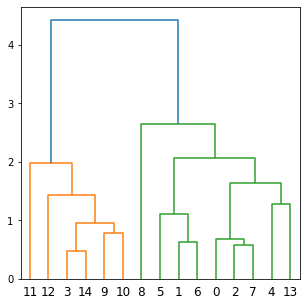

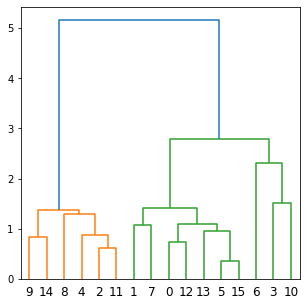

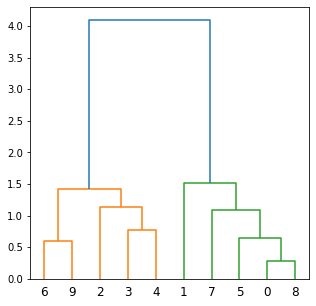

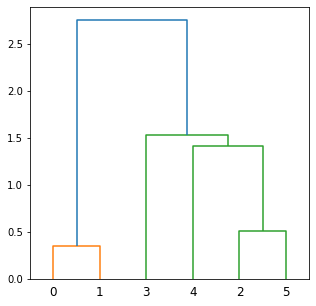

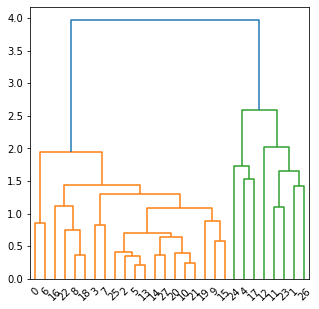

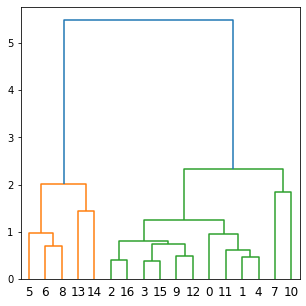

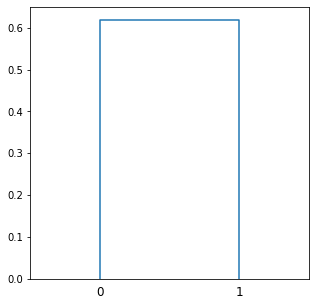

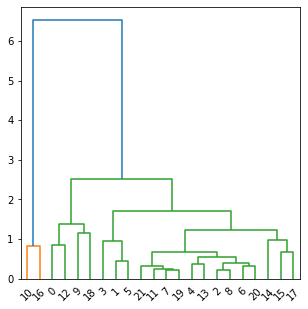

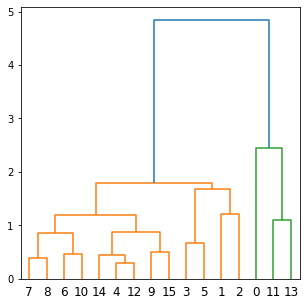

In [182]:
import os
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster

# 3. 상관계수로 카테고리 클러스터링 진행
## 계층 시각화
for i in range(1,10):
    plt.figure(figsize=(5,5))
    exec("dend=sch.dendrogram(sch.linkage(c" + str(i) + ",method='complete'))" )#method 설정 가능

## 클러스터링 결과 저장
for i in range(1,10):
    exec("corr=c"+str(i)+".values")
    pdist = sch.distance.pdist(corr)
    exec("predict" +str(i) + "=pd.DataFrame(sch.fcluster(sch.linkage(c" + str(i) +",method='complete'),0.7 * pdist.max() ,criterion='distance'))")
    exec("predict"+ str(i)+ ".columns=['ltf_cluster']")

## 클러스터링 결과 확인
for i in range(1,10):
    print(i)
    exec("corr=c"+str(i)+".values")
    pdist = sch.distance.pdist(corr)
    exec("predict =pd.DataFrame(sch.fcluster(sch.linkage(c" + str(i) +",method='complete'),0.7 * pdist.max(),criterion='distance'))")
    predict.columns=['ltf_cluster']
    print(predict)

In [186]:
## 카테고리 클러스터링 결과 정리된 데이터 프레임 생성
for i in range(1,10): #여기서 i는 행정동별 클러스터
    exec("predict"+ str(i)+ "['nationality']= c" + str(i)+ ".columns") #행정동별, 카데고리별 클러스터링 결과 병합

    # 배출량, 카드데이터 합친 df2에서 행정동별 클러스터링 같은 것 추출해서, 위의 데이터와 합침
    exec("df2_"+str(i)+ "=pd.merge(df2[df2['cluster']==" + str(i)+ "], predict" + str(i) + ", on='nationality', how='outer')")
    exec("df2_"+str(i)+ "=df2_"+str(i)+ ".fillna(9)") #카테고리 클러스터링 안된것은 9로 
    exec("df3_"+ str(i)+ "= df2_"+ str(i)+".groupby(['year_month','ltf_cluster']).sum().reset_index()") # 최종적으로 카테고리별 클러스터링 된 것끼리 합

ltf_cluster = pd.DataFrame(columns= list(set(df2['nationality'])))
for i in range(1,10):
    exec("predict"+str(i)+".set_index('nationality',inplace = True)")
    exec("ltf_cl"+ str(i)+"=pd.concat([ltf_cluster, predict" + str(i)+ ".T], join='outer')")

aa= pd.concat([ltf_cl1, ltf_cl2, ltf_cl3, ltf_cl4, ltf_cl5, ltf_cl6, ltf_cl7, ltf_cl8, ltf_cl9], axis=0)
aa= aa.fillna(9)
aa= aa.reset_index(drop=True)
aa.loc[:,'emd_cluster'] = pd.Series([1,2,3,4,5,6,7,8,9] , index= aa.index)

/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [187]:
aa

,AUS,BGD,CAN,CHN,DEU,EGY,ETC,FRA,GBR,IDN,...,PAK,PHL,RUS,THA,TWN,UKR,USA,UZB,VNM,emd_cluster
0,2,2,2,1,2,2,2,9,9,9,...,1,9,9,1,1,2,9,9,1,1
1,2,9,2,1,9,2,9,1,9,9,...,2,2,9,9,1,9,9,9,2,2
2,9,9,9,9,9,9,2,9,9,2,...,9,1,9,2,2,9,9,9,1,3
3,9,9,9,9,1,9,9,1,9,2,...,9,9,9,9,9,9,9,9,2,4
4,1,2,1,9,1,2,1,1,1,1,...,9,1,1,1,2,2,1,2,1,5
5,9,9,9,9,9,9,2,2,9,2,...,2,2,1,1,2,9,9,9,2,6
6,9,9,9,9,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,7
7,9,2,2,2,2,9,2,2,2,2,...,1,2,2,2,9,9,2,9,2,8
8,2,1,1,9,1,9,1,1,9,9,...,9,1,2,1,2,9,1,9,1,9


In [189]:
# 4. 행정동 클러스터별, 카드내역 카테고리 클러스터별, 배출량과 카드소비액 사이의 상관관계
## 차분&지연
for i in range(1,10):
    # n=0
    # exec("corr_data_" +str(i) + "= pd.DataFrame(index= range(0,1),columns =list(set(df3_"+str(i)+"['stf_cluster'])))")      
    print(i)
    exec("temp_list_"+str(i)+" = [np.nan]")
    exec("temp1= df3_"+ str(i))
    
    for j in set(temp1['ltf_cluster']):
        temp2 = temp1[temp1['ltf_cluster']==j]
        temp2['em_g']= temp2['em_g'].diff()
        temp2['tot']= temp2['tot'].diff()
        temp2['tot']= temp2['tot'].shift(1)
        temp2= temp2.dropna(axis=0)
        temp_corr = temp2[['em_g', 'tot']].corr()
        print(round(temp_corr.iloc[0,1],2))

1
-0.07
-0.22
-0.01
2
0.06
-0.2
-0.24
3
-0.08
-0.39
-0.12
4
0.2
-0.28
-0.06
5
0.24
0.27
-0.21
6
-0.31
-0.32
-0.39
7
0.13
-0.03
-0.08
8
-0.14
0.05
0.04
9
0.05
0.11
-0.08


/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [191]:
## 로그&지연
for i in range(1,10):
    # n=0
    # exec("corr_data_" +str(i) + "= pd.DataFrame(index= range(0,1),columns =list(set(df3_"+str(i)+"['ltf_cluster'])))")      
    print(i)
    exec("temp_list_"+str(i)+" = [np.nan]")
    exec("temp1= df3_"+ str(i))
    
    for j in set(temp1['ltf_cluster']):
        temp2 = temp1[temp1['ltf_cluster']==j]
        temp2['tot']= temp2['tot'].shift(1)
        temp2= temp2.dropna(axis=0)
        temp_corr = np.log(temp2[['em_g', 'tot']]).corr()
        print(round(temp_corr.iloc[0,1],2))

1
0.55
-0.13
0.03
2
0.56
-0.36
0.06
3
0.43
-0.53
0.24
4
0.52
-0.46
-0.11
5
0.63
0.53
0.66
6
-0.82
0.68
0.18
7
0.56
0.38
-0.0
8
-0.78
0.87
-0.11
9
0.48
-0.38
-0.15


/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [192]:
aa

,AUS,BGD,CAN,CHN,DEU,EGY,ETC,FRA,GBR,IDN,...,PAK,PHL,RUS,THA,TWN,UKR,USA,UZB,VNM,emd_cluster
0,2,2,2,1,2,2,2,9,9,9,...,1,9,9,1,1,2,9,9,1,1
1,2,9,2,1,9,2,9,1,9,9,...,2,2,9,9,1,9,9,9,2,2
2,9,9,9,9,9,9,2,9,9,2,...,9,1,9,2,2,9,9,9,1,3
3,9,9,9,9,1,9,9,1,9,2,...,9,9,9,9,9,9,9,9,2,4
4,1,2,1,9,1,2,1,1,1,1,...,9,1,1,1,2,2,1,2,1,5
5,9,9,9,9,9,9,2,2,9,2,...,2,2,1,1,2,9,9,9,2,6
6,9,9,9,9,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,7
7,9,2,2,2,2,9,2,2,2,2,...,1,2,2,2,9,9,2,9,2,8
8,2,1,1,9,1,9,1,1,9,9,...,9,1,2,1,2,9,1,9,1,9
